# __LAB 8__
### Q1. Sequential Feature Selection
#### Data Preprocessing & Cleaning


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


df = pd.read_csv('./train.csv')
df.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [20]:

df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Handling missing values

In [21]:
df.isnull().sum() / df.shape[0] * 100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [22]:
df = df.dropna(axis=0)

#### Handling Categorical values

In [23]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols
df[cat_cols].nunique()


Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64

In [24]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[cat_cols] = enc.fit_transform(df[cat_cols])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,13,1.0,2.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0.0
1,1.0,1.0,25,0.0,0.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0.0
2,0.0,0.0,26,0.0,0.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1.0
3,0.0,0.0,25,0.0,0.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0.0
4,1.0,0.0,61,0.0,0.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1.0


#### Min Max Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns=cols)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0


#### 1.2 SFS using Decision Tree

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

sfs1 = SFS(DecisionTreeClassifier(), k_features=10, forward=True, floating=False, scoring='accuracy')
sfs1.fit(X, y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), scoring='accuracy')

In [27]:
print("The selected features are: ")
print(sfs1.k_feature_names_)

print("\n The K score is: {} ".format(sfs1.k_score_))


The selected features are: 
('Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Online boarding', 'Seat comfort', 'Baggage handling', 'Inflight service')

 The K score is: 0.9505859467501931 


#### 1.3 SFS with toggling

In [28]:
sfs = SFS(DecisionTreeClassifier(),  k_features=5, forward=True, floating=False, scoring='accuracy', cv=4).fit(X, y)
sbs = SFS(DecisionTreeClassifier(),  k_features=5, forward=False, floating=False, scoring='accuracy', cv=4).fit(X, y)
sffs = SFS(DecisionTreeClassifier(),  k_features=5, forward=True, floating=True, scoring='accuracy', cv=4).fit(X, y)
sbfs = SFS(DecisionTreeClassifier(),  k_features=5, forward=False, floating=True, scoring='accuracy', cv=4).fit(X, y)


In [29]:
print("CV Score for SFS: {}".format(round(sfs.k_score_, 4)))
print("CV Score for SBS: {}".format(round(sbs.k_score_, 4)))
print("CV Score for SFFS: {}".format(round(sffs.k_score_, 4)))
print("CV Score for SBFS: {}".format(round(sbfs.k_score_, 4)))

CV Score for SFS: 0.9288
CV Score for SBS: 0.9304
CV Score for SFFS: 0.9288
CV Score for SBFS: 0.9401


In [30]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7897602224024094, 0.7918066334607514, 0.793...",0.790335,"(Online boarding,)",0.004065,0.002536,0.001464
2,"(3, 11)","[0.8483339125062743, 0.8511911656820726, 0.850...",0.849615,"(Type of Travel, Online boarding)",0.002085,0.0013,0.000751
3,"(3, 6, 11)","[0.8914629908490675, 0.8920421637901077, 0.892...",0.891249,"(Type of Travel, Inflight wifi service, Online...",0.002214,0.001381,0.000797
4,"(3, 6, 9, 11)","[0.9192246804895942, 0.9228927757828488, 0.922...",0.921733,"(Type of Travel, Inflight wifi service, Gate l...",0.002346,0.001463,0.000845
5,"(1, 3, 6, 9, 11)","[0.9277578284875864, 0.9284914475462374, 0.929...",0.928828,"(Customer Type, Type of Travel, Inflight wifi ...",0.001202,0.00075,0.000433


In [31]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9423143750723966, 0.9461755280126646, 0.945...",0.945113,"(Gender, Customer Type, Age, Type of Travel, C...",0.002698,0.001683,0.000972
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[0.9436657786014904, 0.9459438588362485, 0.946...",0.945557,"(Gender, Customer Type, Age, Type of Travel, C...",0.00177,0.001104,0.000637
20,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15...","[0.9427004903664234, 0.9480674929533959, 0.946...",0.945779,"(Gender, Customer Type, Age, Type of Travel, C...",0.003108,0.001939,0.001119
19,"(0, 1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 1...","[0.9429321595428395, 0.9468319240125102, 0.946...",0.946136,"(Gender, Customer Type, Age, Type of Travel, C...",0.003254,0.00203,0.001172
18,"(1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, ...","[0.9445924553071547, 0.9465616433066913, 0.946...",0.946261,"(Customer Type, Age, Type of Travel, Class, Fl...",0.001681,0.001048,0.000605
17,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9450557936599868, 0.9474883200123557, 0.944...",0.946676,"(Customer Type, Age, Type of Travel, Class, In...",0.002979,0.001859,0.001073
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9462913626008727, 0.947333873894745, 0.9442...",0.946464,"(Customer Type, Age, Type of Travel, Class, In...",0.002273,0.001418,0.000819
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9449399590717789, 0.9469477586007182, 0.944...",0.946117,"(Customer Type, Age, Type of Travel, Class, In...",0.002482,0.001548,0.000894
14,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18,...","[0.9442449515425306, 0.9459824703656512, 0.945...",0.945663,"(Customer Type, Age, Type of Travel, Class, In...",0.001715,0.00107,0.000618
13,"(1, 3, 4, 6, 9, 11, 12, 13, 15, 16, 17, 18, 19)","[0.9443221746013359, 0.94466967836596, 0.94509...",0.945557,"(Customer Type, Type of Travel, Class, Infligh...",0.002433,0.001518,0.000876


In [32]:
pd.DataFrame.from_dict(sffs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.7897602224024094, 0.7918066334607514, 0.793...",0.790335,"(Online boarding,)",0.004065,0.002536,0.001464
2,"(3, 11)","[0.8483339125062743, 0.8511911656820726, 0.850...",0.849615,"(Type of Travel, Online boarding)",0.002085,0.0013,0.000751
3,"(3, 6, 11)","[0.8914629908490675, 0.8920421637901077, 0.892...",0.891249,"(Type of Travel, Inflight wifi service, Online...",0.002214,0.001381,0.000797
4,"(3, 6, 9, 11)","[0.9192246804895942, 0.9228927757828488, 0.922...",0.921733,"(Type of Travel, Inflight wifi service, Gate l...",0.002346,0.001463,0.000845
5,"(1, 3, 6, 9, 11)","[0.9277578284875864, 0.9284914475462374, 0.929...",0.928828,"(Customer Type, Type of Travel, Inflight wifi ...",0.001202,0.00075,0.000433


In [33]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9431252171898529, 0.9466002548360941, 0.944...",0.945103,"(Gender, Customer Type, Age, Type of Travel, C...",0.002216,0.001383,0.000798
21,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[0.9433954978956717, 0.9462527510714699, 0.946...",0.946078,"(Gender, Customer Type, Age, Type of Travel, C...",0.002821,0.00176,0.001016
20,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[0.9445924553071547, 0.945519132012819, 0.9453...",0.946203,"(Gender, Customer Type, Age, Type of Travel, C...",0.00299,0.001865,0.001077
19,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...","[0.9454419089540137, 0.946484420247886, 0.9471...",0.946648,"(Gender, Customer Type, Age, Type of Travel, C...",0.001265,0.000789,0.000456
18,"(1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 1...","[0.9445538437777521, 0.9475269315417584, 0.946...",0.94658,"(Customer Type, Age, Type of Travel, Class, Fl...",0.001904,0.001188,0.000686
17,"(1, 2, 3, 4, 5, 6, 9, 11, 12, 13, 14, 15, 16, ...","[0.94466967836596, 0.9477199891887718, 0.94667...",0.946358,"(Customer Type, Age, Type of Travel, Class, Fl...",0.001757,0.001096,0.000633
16,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.9464071971890806, 0.948183327541604, 0.9445...",0.946966,"(Customer Type, Age, Type of Travel, Class, In...",0.002623,0.001636,0.000945
15,"(1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17,...","[0.94466967836596, 0.9470635931889262, 0.94501...",0.946097,"(Customer Type, Age, Type of Travel, Class, In...",0.002047,0.001277,0.000737
14,"(1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 20,...","[0.9452102397775975, 0.9466774778948994, 0.944...",0.945827,"(Customer Type, Age, Type of Travel, Class, In...",0.001191,0.000743,0.000429
13,"(1, 2, 3, 4, 6, 9, 11, 12, 14, 16, 17, 18, 20)","[0.945519132012819, 0.9461755280126646, 0.9437...",0.945798,"(Customer Type, Age, Type of Travel, Class, In...",0.002351,0.001466,0.000847


#### 1.4 Visualisation 

Text(0.5, 1.0, 'SFS')

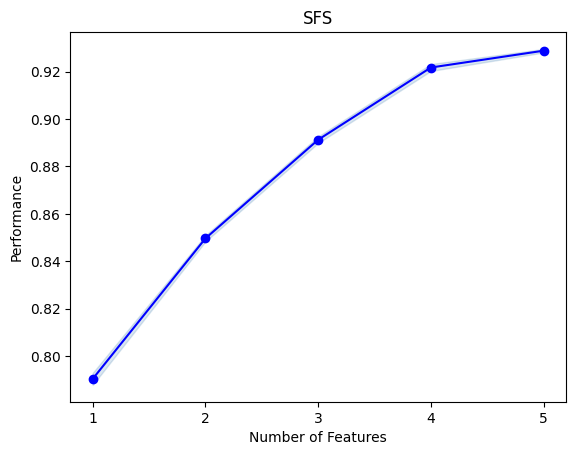

In [34]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs.get_metric_dict(), kind = "std_dev")
plt.title("SFS")

Text(0.5, 1.0, 'SBS')

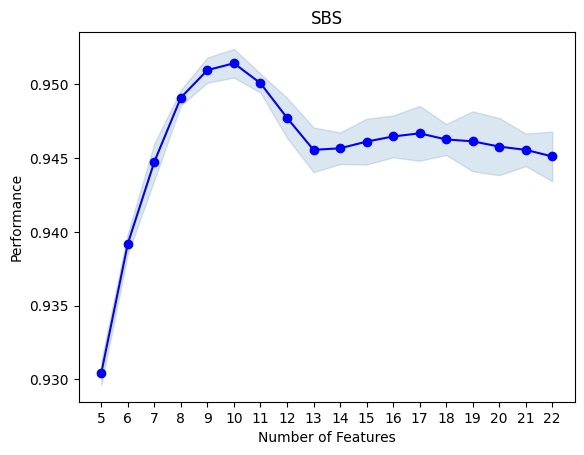

In [35]:
plot_sfs(sbs.get_metric_dict(), kind = "std_dev")
plt.title("SBS")

Text(0.5, 1.0, 'SFFS')

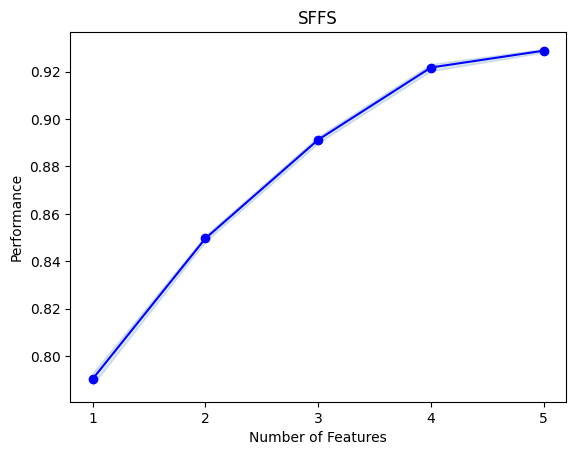

In [36]:
plot_sfs(sffs.get_metric_dict(), kind = "std_dev")
plt.title("SFFS")

Text(0.5, 1.0, 'SBFS')

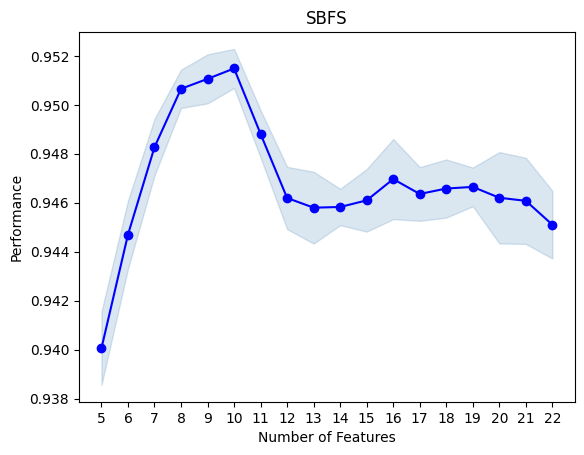

In [37]:
plot_sfs(sbfs.get_metric_dict(), kind = "std_dev")
plt.title("SBFS")

#### Q2. Data creation & Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sigma = np.array([[0.6006771, 0.14889879, 0.244939], [0.14889879, 0.58982531, 0.24154981], [0.244939, 0.24154981, 0.48778655]])
mu = np.array([0, 0, 0])
df = pd.DataFrame(np.random.multivariate_normal(mean = mu, cov = sigma, size=(1000, )))

v = np.array([1/np.sqrt(6), 1/np.sqrt(6), -2/np.sqrt(6)])
cls = []
for row in df.iterrows():
    res = np.dot(np.array(row[1]), v)
    if (res > 0):
        cls.append(0)
    else:
        cls.append(1)

df["class"] = cls

df.columns = ['A', 'B', 'C', 'class']


In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=df['A'],
    y=df['B'],
    z=df['C'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['class'],                # set color to an array/list of desired values
        colorscale=[[0, '#f72585'], [1.0, '#4cc9f0']],   # choose a colorscale
        opacity=0.8,
        
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### 2.2 Principal Component Analysis

In [4]:
from sklearn.decomposition import PCA
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

pca = PCA(n_components=3)
df_transformed = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
pca.explained_variance_ratio_

df_transformed['class'] = y
df_transformed.head()


,A,B,C,class
0,-1.039908,0.094876,0.424167,1
1,1.313806,-1.347210,-0.608209,0
2,0.523141,-0.651225,0.458775,1
3,-0.746361,-0.893638,0.562807,1
4,-0.954860,-1.136207,0.497854,1


In [5]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_transformed['A'],
    y=df_transformed['B'],
    z=df_transformed['C'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_transformed['class'],                # set color to an array/list of desired values
        colorscale=[[0, '#f72585'], [1.0, '#4cc9f0']],   # choose a colorscale
        opacity=0.8,
        
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Complete FS

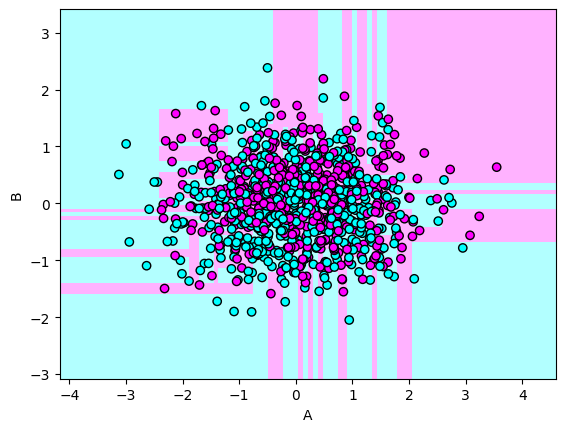

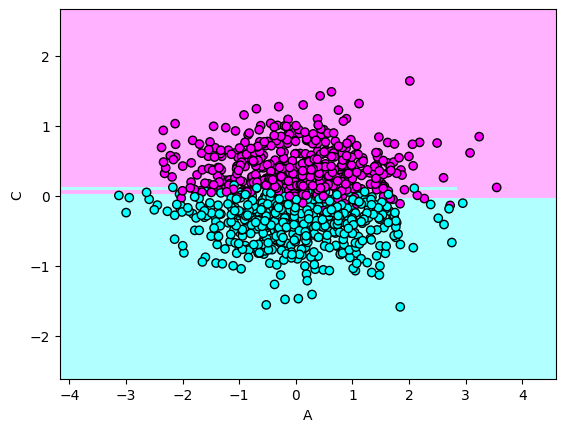

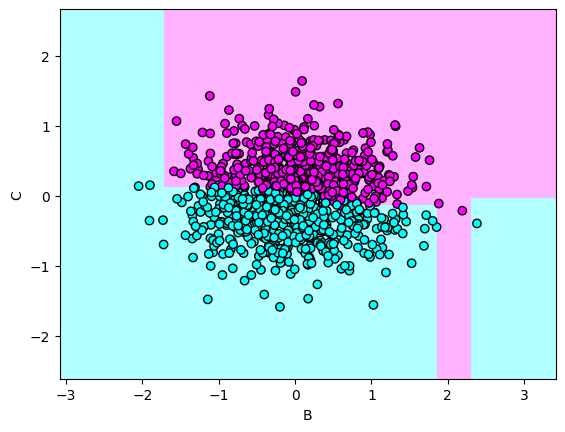

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

for i in range(len(df_transformed.columns)-1):
    for j in range(i+1, len(df_transformed.columns)-1):
        # print("{}, {}\n".format(df_transformed.columns[i], df_transformed.columns[j]))
        X = df_transformed[[df_transformed.columns[i], df_transformed.columns[j]]]
        y = df_transformed.iloc[:, -1]
        clf = DecisionTreeClassifier().fit(X, y)

        disp = DecisionBoundaryDisplay.from_estimator(clf, X, plot_method='pcolormesh', alpha = 0.3, cmap = plt.cm.cool)
        disp.ax_.scatter(df_transformed[df_transformed.columns[i]], df_transformed[df_transformed.columns[j]], c = y, edgecolor = 'k', cmap='cool')


        